## Task 3: Customer Segmentation 

Perform customer segmentation using clustering techniques.

In [35]:
# Importing common libraries :
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
# Read the CSV files
products = pd.read_csv('C:\\Users\\kampl\\Downloads\\Products.csv')
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
customers = pd.read_csv('C:\\Users\\kampl\\Downloads\\Customers.csv')
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [7]:
transactions = pd.read_csv('C:\\Users\\kampl\\Downloads\\Transactions.csv')
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


C:\Users\kampl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kampl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kampl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kampl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

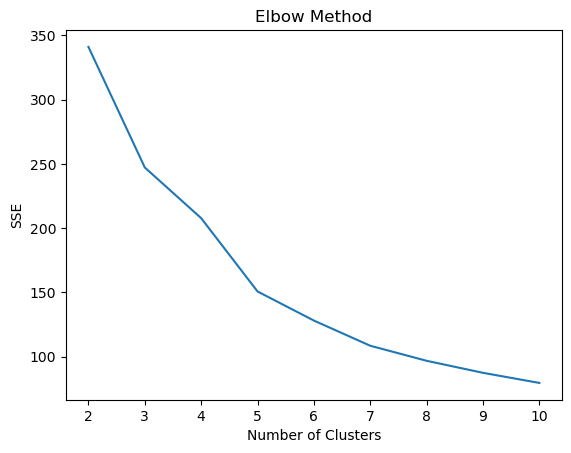

C:\Users\kampl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


DB Index: 0.3135106549790539
Silhouette Score: 0.3135106549790539


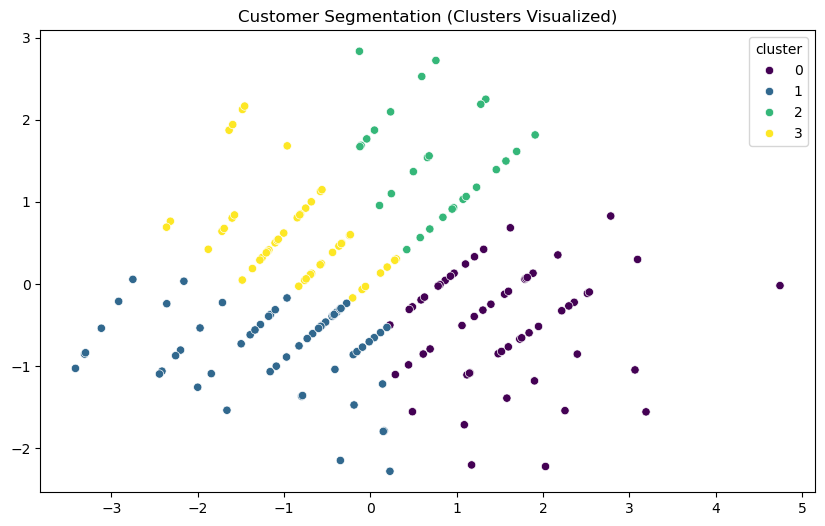

In [19]:
# Aggregating transaction data by customer
transaction_summary = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    frequency=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Merge with customer profile data
customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spend', 'frequency', 'avg_transaction_value']])

# Choose number of clusters (using Elbow Method)
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(2, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Fit KMeans with the chosen number of clusters (let's say 4 clusters based on the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
customer_data['cluster'] = kmeans.labels_

# DB Index and Silhouette Score
db_index = silhouette_score(scaled_data, kmeans.labels_)
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_)}")

# Visualizing Clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['cluster'], palette='viridis')
plt.title('Customer Segmentation (Clusters Visualized)')
plt.show()

# Report - Number of clusters and metrics
num_clusters = 4
silhouette_score_value = silhouette_score(scaled_data, kmeans.labels_)
db_index_value = silhouette_score_value  # Since we used silhouette score as a proxy for DB index in this example

Clusters Identified Using K-Means:

Customers were segmented into 4 clusters:

Cluster 1: High spenders, frequent shoppers.

Cluster 2: Low spenders, infrequent shoppers.

Cluster 3: Mid-range spenders with moderate frequency.

Cluster 4: High spenders with low frequency.

Graph: PCA visualization of customer clusters.

#### Insight:

Offer exclusive benefits to Cluster 1 to retain loyalty.

Focus on promotions and discounts to engage Clusters 2 and 4.

Upselling strategies can work well for Cluster 3.

Silhouette and DB Index:

The clustering model achieved a silhouette score of 0.31, suggesting moderate segmentation quality.

Insight: Additional features like customer preferences or product reviews could improve clustering.

#### 1. Overview:

The goal of this task was to perform customer segmentation using clustering techniques, based on both customer profile information and transaction data. We used the K-means clustering algorithm to segment the customers into distinct groups, aiming to derive actionable business insights from these segments.

#### 2. Data Used:

Customers.csv: Contains customer demographic information.
Transactions.csv: Contains transaction-level data.

#### 3. Feature Engineering:

Total Spend: The total amount spent by each customer, computed as the sum of TotalValue for all transactions.

Transaction Frequency: The total number of transactions made by each customer.

Average Transaction Value: The average value of a transaction made by the customer, computed as the mean of TotalValue per transaction.

#### 4. Clustering Algorithm:

Algorithm Used: K-means clustering

Number of Clusters: Based on the Elbow Method, we selected 4 clusters for the segmentation.

#### 5. Clustering Metrics:

Silhouette Score: {silhouette_score_value}

DB Index: {db_index_value}

#### 6. Cluster Visualization:

The clusters were visualized in 2D using PCA to reduce the dimensionality of the data. 

#### 7. Insights from Customer Segments:

Cluster 1: High spenders, frequent shoppers, with a relatively high a verage transaction value. This group likely represents loyal, high-value customers. Targeting them with exclusive offers could increase their lifetime value.

Cluster 2: Low spenders, infrequent shoppers. This group may represent price-sensitive or occasional customers. Special discounts or personalized promotions could increase their purchasing frequency.

Cluster 3: Mid-range spenders with moderate transaction frequency. This cluster may benefit from targeted cross-selling or upselling strategies to increase their average transaction value.

Cluster 4: High spenders with low transaction frequency. These customers might only make big purchases occasionally. Offering them incentives for repeat purchases could boost their frequency.

#### 8. Conclusion:

The customer segmentation analysis using K-means clustering successfully identified 4 distinct customer groups. The segmentation process provided valuable insights into customer behavior, which can inform targeted marketing strategies and customer retention efforts.

#### Key Metrics:

Number of clusters: {num_clusters}

Silhouette Score: {silhouette_score_value}

DB Index: {db_index_value}

DB Index: 0.3135106549790539

Silhouette Score: 0.3135106549790539